In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

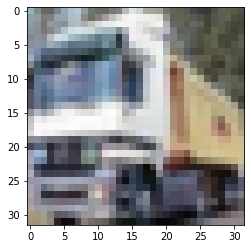

In [7]:
plt.imshow(X_train[0])

In [8]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
y_train = y_train.reshape(-1,)
classes[y_train[0]]

'frog'

In [14]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

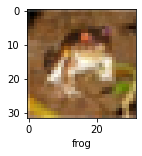

In [15]:
plot_sample(X_train,y_train,0)

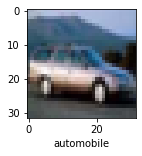

In [17]:
plot_sample(X_train,y_train,4)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [23]:
#model building
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
])

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.8602 - accuracy: 0.3331
Epoch 2/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.6575 - accuracy: 0.41310s -
Epoch 3/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.5689 - accuracy: 0.4462
Epoch 4/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.5080 - accuracy: 0.4688
Epoch 5/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4557 - accuracy: 0.4862


In [22]:
tf.__version__

'2.3.0'

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification_report: \n',classification_report(y_test,y_pred_classes))

Classification_report: 
               precision    recall  f1-score   support

           0       0.64      0.31      0.41      1000
           1       0.70      0.49      0.58      1000
           2       0.23      0.70      0.34      1000
           3       0.32      0.41      0.36      1000
           4       0.47      0.19      0.27      1000
           5       0.44      0.25      0.32      1000
           6       0.47      0.54      0.51      1000
           7       0.69      0.32      0.44      1000
           8       0.52      0.67      0.58      1000
           9       0.67      0.39      0.49      1000

    accuracy                           0.43     10000
   macro avg       0.51      0.43      0.43     10000
weighted avg       0.51      0.43      0.43     10000



In [27]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 30ms/step - loss: 2.0075 - accuracy: 0.27360s - loss: 2.009
Epoch 2/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6264 - accuracy: 0.4201
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4375 - accuracy: 0.4883
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.3361 - accuracy: 0.5303
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.2569 - accuracy: 0.5582
Epoch 6/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1882 - accuracy: 0.5832
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1306 - accuracy: 0.6034
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0750 - accuracy: 0.6270
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0297 - accuracy: 0.6418
Epoch 10/10
1563/1563 [=========================

In [28]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0495 - accuracy: 0.6361


[1.0494939088821411, 0.6360999941825867]

In [29]:
y_pred = cnn.predict(X_test)
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [31]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes

[5,
 1,
 8,
 0,
 4,
 6,
 1,
 6,
 3,
 1,
 4,
 9,
 6,
 7,
 9,
 6,
 5,
 7,
 8,
 6,
 7,
 2,
 2,
 9,
 4,
 4,
 4,
 4,
 9,
 6,
 6,
 2,
 4,
 5,
 9,
 9,
 7,
 9,
 9,
 5,
 0,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 2,
 9,
 0,
 6,
 3,
 8,
 8,
 7,
 5,
 5,
 4,
 7,
 5,
 6,
 1,
 6,
 6,
 1,
 0,
 3,
 9,
 2,
 6,
 8,
 8,
 9,
 2,
 9,
 3,
 5,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 9,
 9,
 9,
 0,
 4,
 8,
 6,
 4,
 6,
 6,
 8,
 7,
 7,
 4,
 5,
 6,
 6,
 1,
 1,
 2,
 6,
 8,
 7,
 7,
 0,
 2,
 2,
 9,
 4,
 0,
 7,
 6,
 7,
 0,
 5,
 9,
 2,
 8,
 0,
 0,
 3,
 3,
 0,
 4,
 1,
 9,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 4,
 5,
 6,
 5,
 8,
 7,
 6,
 6,
 7,
 5,
 0,
 9,
 6,
 9,
 0,
 6,
 2,
 9,
 5,
 4,
 0,
 1,
 6,
 6,
 8,
 7,
 8,
 6,
 7,
 0,
 9,
 6,
 0,
 2,
 9,
 9,
 6,
 7,
 5,
 9,
 9,
 5,
 6,
 6,
 7,
 8,
 6,
 2,
 7,
 8,
 6,
 3,
 0,
 1,
 7,
 4,
 8,
 3,
 7,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 5,
 9,
 5,
 7,
 0,
 7,
 7,
 9,
 0,
 7,
 7,
 4,
 9,
 5,
 3,
 9,
 6,
 2,
 3,
 2,
 3,
 1,
 5,
 1,
 8,
 0,
 4,
 9,
 5,
 2,
 1,
 9,
 2,
 9,
 0,
 6,
 0,
 8,
 2,
 0,


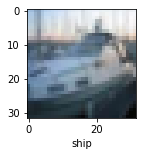

In [37]:
plot_sample(X_test,y_test,2)

In [38]:
classes[y_pred_classes[2]]

'ship'

In [39]:
print("Classification report: \n", classification_report(y_test,y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.70      0.70      1000
           1       0.78      0.66      0.72      1000
           2       0.58      0.45      0.50      1000
           3       0.59      0.28      0.38      1000
           4       0.55      0.62      0.58      1000
           5       0.55      0.59      0.57      1000
           6       0.62      0.83      0.71      1000
           7       0.63      0.77      0.70      1000
           8       0.82      0.68      0.75      1000
           9       0.59      0.79      0.68      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.63     10000
weighted avg       0.64      0.64      0.63     10000



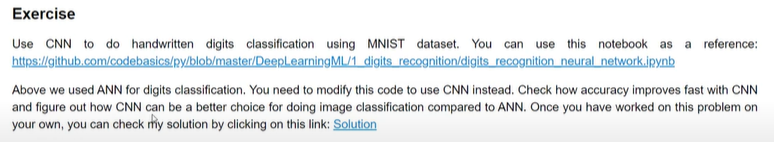

In [56]:
(X_train,y_train),(X_test,y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [59]:
X_train = X_train.reshape(60000,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [60]:
X_train.shape

(60000, 28, 28, 1)

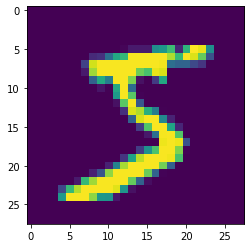

In [61]:
plt.imshow(X_train[0])

In [62]:
X_train = X_train/255
X_test = X_test/255

In [67]:
mnist_cnn = models.Sequential([
    layers.Conv2D(filters=10, kernel_size=(5,5), activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
#     layers.Conv2D(filters=5, kernel_size=(3,3), activation='relu',input_shape=(28,28,1)),
#     layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(50,activation='relu'),
    layers.Dense(10,activation='softmax')
])

mnist_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #categories 1,2,3... sparse because output is integer
    metrics=['accuracy']
)

mnist_cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1976 - accuracy: 0.9426
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0706 - accuracy: 0.9786 0s - loss: 0.0707 - 
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0491 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0388 - accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0303 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0192 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0126 - accuracy: 0.9960
Epoch 10/10
1875/1875 [=============================

In [64]:
X_test.shape

(10000, 28, 28)

In [66]:
X_test = X_test.reshape(10000,28,28,1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0560 - accuracy: 0.9843


[0.05601704865694046, 0.9843000173568726]

In [68]:
mnist_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0557 - accuracy: 0.9843


[0.055740535259246826, 0.9843000173568726]

In [75]:
y_pred = mnist_cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
cm = confusion_matrix(y_test,y_pred_classes)
cm

array([[ 979,    0,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0, 1129,    2,    0,    0,    0,    2,    2,    0,    0],
       [   3,    1, 1017,    7,    0,    0,    0,    3,    0,    1],
       [   0,    0,    2,  999,    0,    7,    0,    0,    2,    0],
       [   0,    0,    2,    0,  966,    0,    2,    0,    1,   11],
       [   1,    0,    0,    5,    0,  885,    1,    0,    0,    0],
       [   8,    3,    1,    0,    2,   11,  932,    0,    1,    0],
       [   0,    2,   18,    2,    1,    1,    0,  999,    1,    4],
       [   5,    0,    6,    6,    0,    4,    0,    3,  946,    4],
       [   0,    2,    2,    5,    5,    4,    0,    0,    0,  991]],
      dtype=int64)

Text(69.0, 0.5, 'Truth')

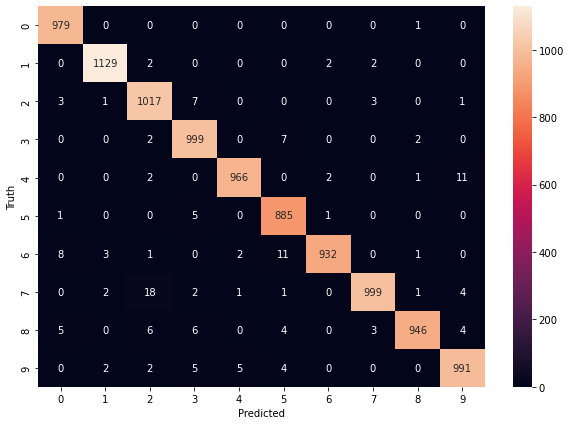

In [76]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')